<a href="https://colab.research.google.com/github/shalu236616/AI-and-ML-PROJECT-/blob/main/Analyze_Time_Series_Network_Traffic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

❤ **Workflow Summary**

Data Loading & Preprocessing

Load the dataset (time_series_network_traffic.csv).







❤ **Set Timestamp as the index and convert it to datetime.**

Create a new column Interval for 6-hour time grouping.

❤ **IP Address Analysis**

Group by Source_IP and count requests

Find the maximum number of requests from any single source IP

❤ **Feature Engineering (Time-Based Features)**

Extract:

year, month, day

hour, minute, second

❤ **Visualization (Hourly Traffic Analysis)**

Group Data_Size_MB by hour and sum.

❤ **Plot using sns.barplot()**

In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load dataset
df = pd.read_csv('/content/time_series_network_traffic.csv')

In [ ]:
print(df.head())

             Timestamp        Source_IP   Destination_IP  Data_Size_MB
0  2024-03-10 10:00:00  168.213.163.186   188.101.21.199          2.87
1  2024-03-10 10:05:00      53.23.143.9   218.161.185.44          7.56
2  2024-03-10 10:10:00      81.14.58.67    217.91.219.10          0.28
3  2024-03-10 10:15:00    5.191.175.101  229.245.189.152          9.45
4  2024-03-10 10:20:00    128.187.99.89   234.201.106.81          8.51


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       1000 non-null   object 
 1   Source_IP       1000 non-null   object 
 2   Destination_IP  1000 non-null   object 
 3   Data_Size_MB    1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
df.isnull().sum()

,0
Timestamp,0
Source_IP,0
Destination_IP,0
Data_Size_MB,0


In [ ]:
print(df.columns)

Index(['Timestamp', 'Source_IP', 'Destination_IP', 'Data_Size_MB'], dtype='object')


In [ ]:

# Ensure Timestamp is a datetime object and set it as the index
df.set_index('Timestamp', inplace=True)
df.index = pd.to_datetime(df.index)
# Create a new column for 6-hour intervals
df['Interval'] = df.index.floor('6H')
# Group by 6-hour intervals
interval_groups = df.groupby('Interval')





In [ ]:
# cheak maximum no of request from all sources for source ip address and destination ip address
ip_pair_counts = df.groupby(["Source_IP"]).size()
max_requests = ip_pair_counts.max()
max_request_pairs = ip_pair_counts[ip_pair_counts == max_requests]
print(f"Maximum number of requests: {max_requests}")
print("IP pairs with maximum requests:")
print(max_request_pairs)

Maximum number of requests: 1
IP pairs with maximum requests:
Source_IP
1.153.214.245     1
1.224.138.212     1
10.103.208.104    1
10.107.210.88     1
10.236.55.244     1
                 ..
98.96.158.216     1
98.99.210.232     1
99.156.115.189    1
99.31.216.85      1
99.99.27.26       1
Length: 1000, dtype: int64


In [ ]:
# extract time feature
df['Timestamp']=df.index
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['day'] = df['Timestamp'].dt.day
df['hour'] = df['Timestamp'].dt.hour
df['minute'] = df['Timestamp'].dt.minute
df['second'] = df['Timestamp'].dt.second
df['dayofweek'] = df['Timestamp'].dt.dayofweek
print(df.head())


                           Source_IP   Destination_IP  Data_Size_MB  \
Timestamp                                                             
2024-03-10 10:00:00  168.213.163.186   188.101.21.199          2.87   
2024-03-10 10:05:00      53.23.143.9   218.161.185.44          7.56   
2024-03-10 10:10:00      81.14.58.67    217.91.219.10          0.28   
2024-03-10 10:15:00    5.191.175.101  229.245.189.152          9.45   
2024-03-10 10:20:00    128.187.99.89   234.201.106.81          8.51   

                               Interval           Timestamp  year  month  day  \
Timestamp                                                                       
2024-03-10 10:00:00 2024-03-10 06:00:00 2024-03-10 10:00:00  2024      3   10   
2024-03-10 10:05:00 2024-03-10 06:00:00 2024-03-10 10:05:00  2024      3   10   
2024-03-10 10:10:00 2024-03-10 06:00:00 2024-03-10 10:10:00  2024      3   10   
2024-03-10 10:15:00 2024-03-10 06:00:00 2024-03-10 10:15:00  2024      3   10   
2024-03-10 10:20

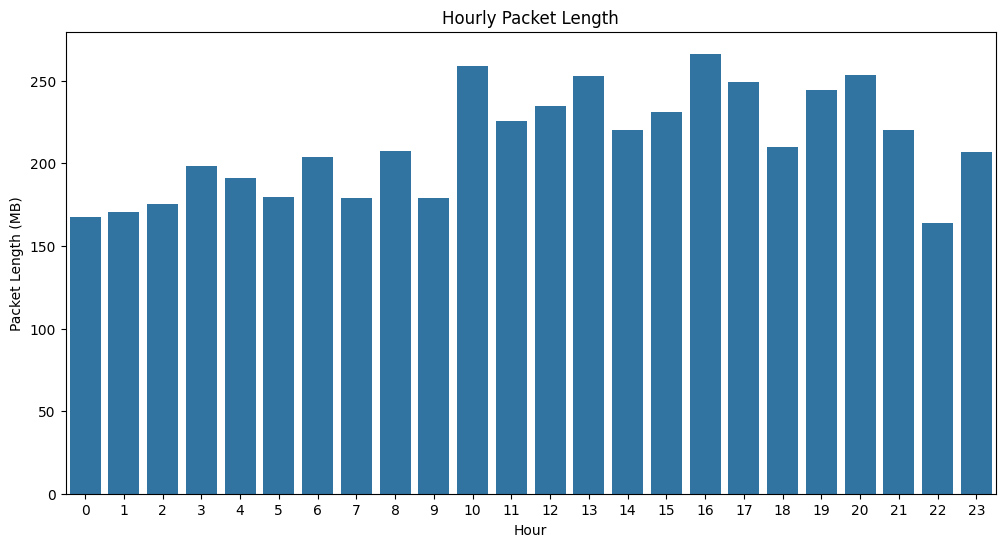

In [ ]:
hourly_packet_length = df.groupby('hour')['Data_Size_MB'].sum().reset_index()
# plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='Data_Size_MB', data=hourly_packet_length)
plt.title('Hourly Packet Length')
plt.xlabel('Hour')
plt.ylabel('Packet Length (MB)')
plt.show()